<a href="https://colab.research.google.com/github/Jnewton-lab/Assignment-1-Two-dimensional-array-and-gradient-problem/blob/main/sprint1_Machine_learning_flow_Assignment_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint machine learning flow

##### Importing necessary libraies

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

- loading and preprocessing the csv dataset

In [5]:
df = pd.read_csv('application_train.csv')
df = df.select_dtypes('number')

In [7]:
df.head().T#displaying the dataframe

,0,1,2,3,4
SK_ID_CURR,100002.0,100003.0,100004.0,100006.0,100007.0
TARGET,1.0,0.0,0.0,0.0,0.0
CNT_CHILDREN,0.0,0.0,0.0,0.0,0.0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,NaN,0.0


In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,98949.000000,98949.000000,98949.000000,9.894900e+04,9.894900e+04,98942.000000,9.886800e+04,98949.000000,98949.000000,98949.000000,...,98948.000000,98948.000000,98948.000000,98948.000000,85656.000000,85656.000000,85656.000000,85656.000000,85656.000000,85656.000000
mean,157395.580238,0.081022,0.417306,1.694313e+05,5.988212e+05,27081.680990,5.381660e+05,0.020849,-16024.918200,63261.352121,...,0.008338,0.000647,0.000515,0.000323,0.006631,0.007355,0.033996,0.269345,0.266146,1.892909
std,33127.394567,0.272870,0.720954,3.854167e+05,4.019545e+05,14457.986682,3.693192e+05,0.013816,4369.376893,140814.156734,...,0.090930,0.025424,0.022697,0.017981,0.085914,0.107582,0.204411,0.922842,0.614077,1.876512
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128773.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16471.125000,2.385000e+05,0.010006,-19667.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,157275.000000,0.000000,0.000000,1.440000e+05,5.124465e+05,24903.000000,4.500000e+05,0.018850,-15742.000000,-1219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,186058.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12386.000000,-291.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,214890.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,8.000000,24.000000,8.000000,25.000000


In [9]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 106, dtype: object

In [10]:
print('Training set shape:', df.shape)

Training set shape: (98949, 106)


In [11]:
df.TARGET.value_counts() / len(df)

0    0.918978
1    0.081022
Name: TARGET, dtype: float64

In [12]:
int_features = df.iloc[:, 2:].select_dtypes('int64').columns.values
float_features = df.iloc[:, 2:].select_dtypes('float').columns.values
str_features = df.iloc[:, 2:].select_dtypes('O').columns.values

print(len(int_features))
print(len(float_features))
print(len(str_features))

19
85
0


##### Dealing with the null values

In [13]:
df_missing_value=df.isnull()#checking the null values

In [14]:
df_missing_value.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()#Displaying the count of null values per column

SK_ID_CURR                        0
TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     13293
AMT_REQ_CREDIT_BUREAU_WEEK    13293
AMT_REQ_CREDIT_BUREAU_MON     13293
AMT_REQ_CREDIT_BUREAU_QRT     13293
AMT_REQ_CREDIT_BUREAU_YEAR    13293
Length: 106, dtype: int64

- Check missing data

In [16]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
miss_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

miss_train

,Total,Percent
COMMONAREA_MODE,69033,69.766243
COMMONAREA_AVG,69033,69.766243
COMMONAREA_MEDI,69033,69.766243
NONLIVINGAPARTMENTS_AVG,68586,69.314495
NONLIVINGAPARTMENTS_MODE,68586,69.314495
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000


##### Determine the number of columns that do not have missing values

In [17]:
No_miss_train = miss_train.loc[miss_train.Total != 0, :]
print(len(No_miss_train))

81


##### Display a histogram of the percentages of missing values across all DataFrames.

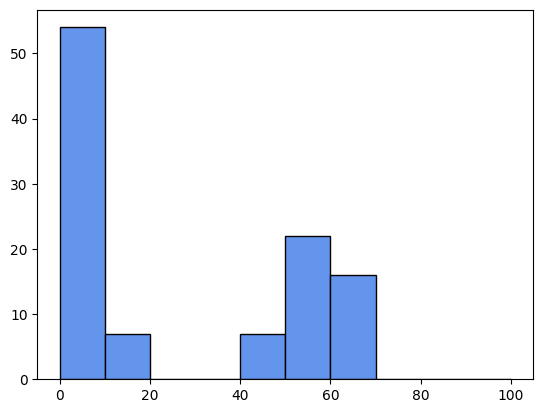

In [18]:
plt.hist(miss_train['Percent'], bins = np.arange(0, 110, 10),
         edgecolor='k', color='cornflowerblue')
plt.show()

#### Check number of unique classes in each object column

In [19]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

***IMPUTATION:***
**Imputation is simply the process of substituting the missing values of our dataset
- cleaning the dataset by filling the empy data(null)
- We can do this by defining our own customised function or we can simply perform imputation by using the SimpleImputer class provided by sklearn.
- ***Or Using the fillna() method***

- Preprocessing

In [20]:
num_features = np.hstack([int_features, float_features])
cat_features = str_features
features = np.hstack([num_features, cat_features])


num_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ]
)

cat_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=True))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    sparse_threshold=0.9
)

In [21]:

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['AMT_REQ_CREDIT_BUREAU_HOUR']])
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = imputer.transform(df[['AMT_REQ_CREDIT_BUREAU_HOUR']])


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['AMT_REQ_CREDIT_BUREAU_DAY']])
df['AMT_REQ_CREDIT_BUREAU_DAY'] = imputer.transform(df[['AMT_REQ_CREDIT_BUREAU_DAY']])


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['AMT_REQ_CREDIT_BUREAU_WEEK']])
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = imputer.transform(df[['AMT_REQ_CREDIT_BUREAU_WEEK']])


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['AMT_REQ_CREDIT_BUREAU_MON']])
df['AMT_REQ_CREDIT_BUREAU_MON'] = imputer.transform(df[['AMT_REQ_CREDIT_BUREAU_MON']])


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['AMT_REQ_CREDIT_BUREAU_QRT']])
df['AMT_REQ_CREDIT_BUREAU_QRT'] = imputer.transform(df[['AMT_REQ_CREDIT_BUREAU_QRT']])


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['AMT_REQ_CREDIT_BUREAU_YEAR']])
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = imputer.transform(df[['AMT_REQ_CREDIT_BUREAU_YEAR']])

#### I used two different ways of imputations

In [22]:
cleaned_df=df.fillna(df.mean())# the fillna() method

- Extract only existing data with no missing values

In [23]:
cleaned_df = cleaned_df[cleaned_df.columns[~cleaned_df.isnull().all()]]

- separating the dataset

In [24]:
y = cleaned_df['TARGET']
X = cleaned_df.drop(['TARGET'], axis=1)

X = X.to_numpy()#converting to numpy

# [Problem 1] Cross Validation

***splitting the dataset***

In [25]:
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [32983 32984 32985 ... 98946 98947 98948] TEST: [    0     1     2 ... 32980 32981 32982]
TRAIN: [    0     1     2 ... 98946 98947 98948] TEST: [32983 32984 32985 ... 65963 65964 65965]
TRAIN: [    0     1     2 ... 65963 65964 65965] TEST: [65966 65967 65968 ... 98946 98947 98948]


**We split the dataset (into Training and Testing sub dataset) using the Kfold which is more better to use than the Train_test_split**

##### Standardization
- It is another integral preprocessing step. In Standardization, we transform our values such that the mean of the values is 0 and the standard deviation is 1
***so we standardize both traning and testing data***

In [26]:
std= StandardScaler()
std.fit(X_train)
X_train_trans = std.transform(X_train)
X_test_trans = std.transform(X_test)

##### Scoring with Cross-Validation

In [ ]:

#create the classifier
classifier = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
classifier.fit(X_train, y_train)
print(classifier)

#predictin on the test set
y_pred = classifier.predict(X_test)
print(y_pred)

#Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#storing the scores
scores = []

print('---------------------------------------------')


#Model= Support Vector Machine

clf_svm = SVC(probability=True)

#Trainin
clf_svm.fit(X_train, y_train)
print(clf_svm)

#Predicting the target value
y_pred_svm = clf_svm.predict_proba(X_test)
print(y_pred_svm)

print('-----------------------------------------------')

#Model = LogisticRegression
%%time
lr_mod = LogisticRegression(C=10, solver='liblinear')
lr_mod.fit(X_train, y_train)

print('Training Acc:', lr_mod.score(X_train, y_train))
print('Training AUC:', roc_auc_score(y_train, lr_mod.predict_proba(X_train)[:,1]))

RandomForestClassifier()
[0 0 0 ... 0 0 0]
Accuracy: 0.9179274171542916
---------------------------------------------


In [ ]:
%%time

lr_cv_results = cross_val_score(lr_mod, X_train, y_train, cv=10, scoring='roc_auc')

print('Validation AUC by fold: ', lr_cv_results)
print('Average Validation AUC: ', np.mean(lr_cv_results))

# [Problem 2] Grid search

In [ ]:
#Check hyperparameter
tuned_params = clf_svm.get_params()
print(tuned_params)

#Specify target hyperparameters
tuned_params = {'C': [1.0], 'cache_size': [200], 'class_weight': [None]}

#Parameter display
print(tuned_params)
score = 'f1'

In [ ]:
#Instance generation for grid search
clf_gscv = GridSearchCV(
    clf_svm,
    tuned_params,
    cv=5, scoring='%s_weighted' % score )

#Check the contents of grid search instances
print(clf_gscv)

In [ ]:
clf_gscv.fit(X_train, y_train)

In [ ]:
sorted(clf_gscv.cv_result_.key())

In [ ]:
print(clf_gscv.best_score_)
print(clf_gscv.best_params_)
print(clf_gscv.best_index_)
print(clf_gscv.refit_time_)

In [ ]:
#Drawing function
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10): """Create a sample plot for indices of a cross-validation object."""

# Generate the training/testing visualizations for each CV split
for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
    # Fill in indices with the training/test groups
    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    ax.scatter(range(len(indices)), [ii + .5] * len(indices),
               c=indices, marker='_', lw=lw, cmap=cmap_cv,
               vmin=-.2, vmax=1.2)

# Plot the data classes and groups at the end
ax.scatter(range(len(X)), [ii + 1.5] * len(X),
           c=y, marker='_', lw=lw, cmap=cmap_data)

ax.scatter(range(len(X)), [ii + 2.5] * len(X),
           c=group, marker='_', lw=lw, cmap=cmap_data)

# Formatting
yticklabels = list(range(n_splits)) + ['class', 'group']
ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
       xlabel='Sample index', ylabel="CV iteration",
       ylim=[n_splits+2.2, -.2], xlim=[0, 100])
ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
return ax

# [Problem 3] Survey from Kaggle Notebooks

***From my survey i noticed the following:***

1. Hyperparameter Tuning using Grid search
- **GRID SEARCH:** Grid search is arguably the most basic hyperparameter tuning method. With this technique, we simply build a model for each possible combination of all of the hyperparameter values provided, evaluating each model, and selecting the architecture which produces the best results
2. Building Model
- We use the scikit-learn library to create models. When coding, this library is written as sklearn, as we  see in the first cell of code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrame
- **The steps to building and using a model are:**
- **Define:** What type of model will it be
- **Fit:** Capture patterns from provided data. This is the heart of modeling.
- **Predict:** Just what it sounds like
- **Evaluate:** Determine how accurate the model's predictions are.
3. Gradient Boosting Machine
- Boosting is a method of converting weak learners into strong learners.
- **Gradient Boosting** trains many models in a gradual, additive and sequential manner
4. Using one type of data
5. Early stopping
- Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration
6. Preprocessing
7. Create Submission

# [Problem 4] Creating a model with high generalization performance

In [ ]:
import lightgbm as lgb

# creating an instance of the model
model = lgb.LGBMClassifier()

# save the default params
default_params = model.get_params()

# number of folds
N_FOLDS = 5

# creating a dataset
train_set = lgb.Dataset(data = X_train)

# Cross validation results when avoid overfitting
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000, early_stopping_rounds = 100, metrics = 'auc', nfold = N_FOLDS, seed = 42)

# displaying the results
print('The maximum validation ROC AUC was: {:.5f}.'.format(cv_results['auc-mean'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['auc-mean'])))

- I have imported the whole dataset
- I created a subset of only numbers
- I split the data using kfold
- I used gridsearchCV to find the best model and params to fine tune my classiffiers
- After finding the results i tested the LGBM classifier and checked it ROC which is good.

##### how much the cross Validation results changed

- We see here a more reasonable result, The lgb.LGBMClassifier gives about about 90% accurate when we try to avoid overfitting

# [Problem 5] Final model selection

In [ ]:
# loading the csv of the test dataset
test_df = pd.read_csv('application_test.csv')

# cleaning the dataset by removing the empy data(null)
test_cleaned_df = test_df.fillna(0)

# separating them into variables
test_X = test_cleaned_df.select_dtypes('number')

# standardizing the data
test_scaler = StandardScaler()
test_X_test_trans = scaler.fit_transform(test_X)

# predicting
test_reg_pred = clf.predict(test_X_test_trans)

kgl_submission = pd.concat([test_df['SK_ID_CURR'], pd.Series(test_reg_pred, name='TARGET')], axis=1)
kgl_submission.to_csv('kaggle_submission.csv', index=False)